In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Storing the Sampled beta values. beta 10, Beta 11r and beta11i
burnin = 4000
file_path = '/home/vaishali/Desktop/accepted_m1M_pol_hpc.dat'
b = np.loadtxt(file_path, usecols=(0,1,3), unpack=True)

In [45]:
b10 = b[0,burnin:]
b11r=b[1,burnin:]
b11i=b[2,burnin:]
length  = b10.shape

In [41]:
Beta = np.sqrt(np.square(b10)+ 2*np.square(b11r) + 2*np.square(b11i))*np.sqrt(3/(4*np.pi))
b_act = 1.23
mean = np.mean(Beta)
(mu, sigma) = norm.fit(Beta)
#Beta1=sorted(Beta)
print(mu)
print(sigma)

2.5102219805744332
0.716727823954044


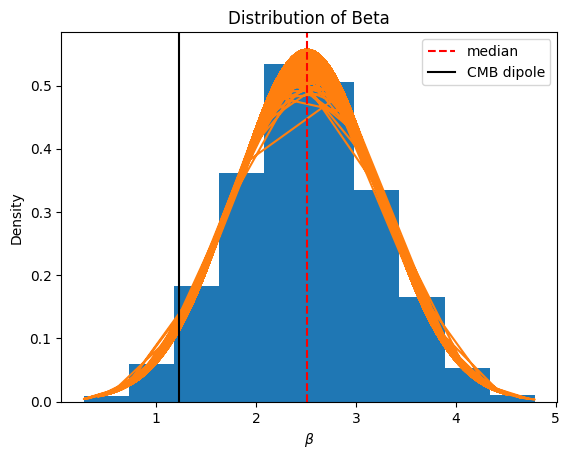

In [42]:
n,bins,patches=plt.hist(Beta,density=True)
plt.plot(Beta,norm.pdf(Beta, mu, sigma))
#plt.axvline(beta,color='green',linestyle='dashed',label='mean of the histogram')
#plt.axvline(beta_mode,color='yellow',linestyle='dashed',label='maximum posterior point')
plt.axvline(mu,color='red',linestyle='dashed',label='median')
plt.fill()
plt.axvline(b_act,color='black',label='CMB dipole')
plt.xlabel(r'$\beta$')
plt.title('Distribution of Beta')
plt.ylabel('Density')
plt.legend()
plt.show()

Check the autocorrelation length of the parameters for different ns
C(n) = avg((ith sample-mean/sigma)i+n th sample - mean / sigma)

Taking n from 0 to 1000

In [80]:
cor_length = np.zeros(shape=(3,1001))
for k in range(3):
    mean = np.mean(b[k,burnin:])
    var = np.var(b[k,burnin:])
    for n in range(1001):
        for i in range(length[0]-n):    
            cor_length[k,n] = cor_length[k,n] + (b[k,i]- mean)*(b[k,i+n]-mean)/var
    cor_length[k,:] = cor_length[k,:]/length[0]        

In [81]:
no = np.ndarray(shape=(1001))
for v in range(1001):
    no[v] = v

Text(0.5, 1.0, '$\\beta 11i$')

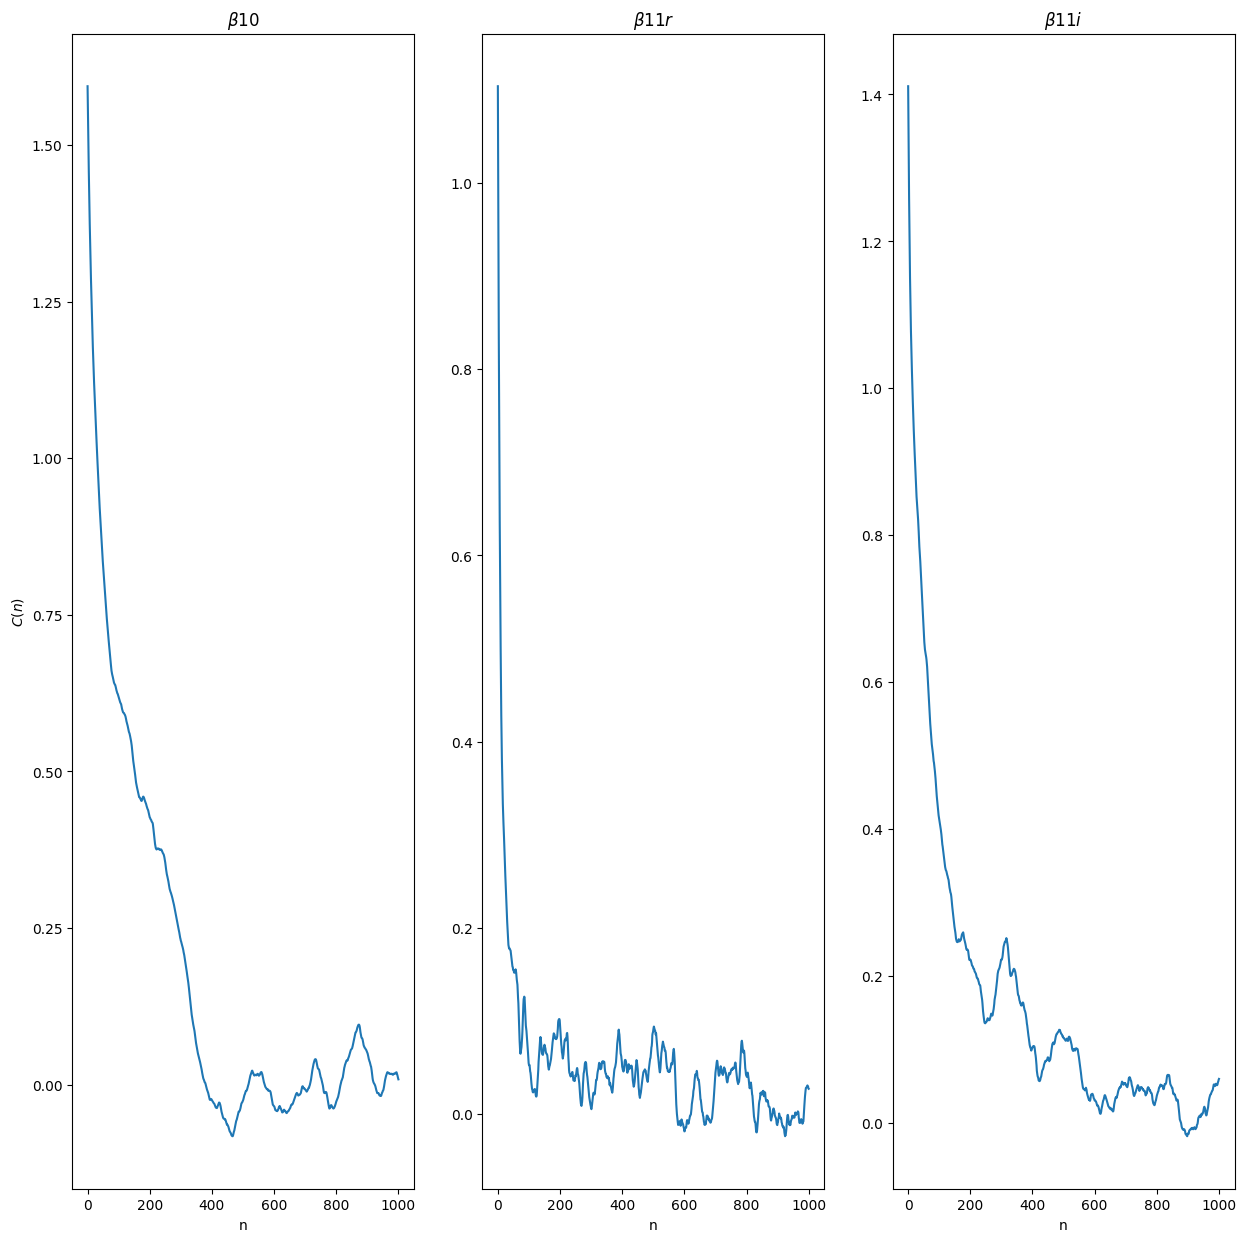

In [83]:
figure,axis = plt.subplots(1,3)
figure.set_figheight(15)
figure.set_figwidth(15)
axis[0].plot(no,cor_length[0,:])
axis[0].set_xlabel('n')
axis[0].set_ylabel('$C(n)$')
axis[0].set_title(r'$\beta 10$')
axis[1].plot(no,cor_length[1,:])
axis[1].set_xlabel('n')
axis[1].set_title(r'$\beta 11r$')
axis[2].plot(no,cor_length[2,:])
axis[2].set_xlabel('n')
axis[2].set_title(r'$\beta 11i$')

In [ ]:
Gelman and Rubin convergence test - for each parameter - here only the beta1N's

In [ ]:
sigma1 = np.ndarray(shape=(3))
for i in range(3):
    mean = np.mean(b[i,burnin:])
    sigma1[i] = np.sum(np.square(mean-b[i,burnin:]))/10000
print(sigma1)  